In [1]:
# set up
from google.colab import drive
drive.mount('/content/drive')

%run '/content/drive/My Drive/hPSC-FAIRness Analysis/scripts/setup_drive.py'

root_dir, data_dir, processed_dir, results_dir = setup_drive()

Mounted at /content/drive
Mounted at /content/drive
Setting up root directory with name: 'hPSC-FAIRness Analysis'
Root directory path: '/content/drive/My Drive/hPSC-FAIRness Analysis'


In [6]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3
#from upsetplot import UpSet
#import ast

In [3]:
df = pd.read_excel(os.path.join(processed_dir,'Final.xlsx'))
df.info()

# Load Infrastructure Lookup Table
lookup_df = pd.read_excel(os.path.join(results_dir, 'Infrastructure Lookup Table.xlsx'))
lookup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21674 entries, 0 to 21673
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   AC                    21674 non-null  object
 1   ID                    21674 non-null  object
 2   CA                    21674 non-null  object
 3   DR                    21627 non-null  object
 4   DT                    21674 non-null  object
 5   OX                    21674 non-null  object
 6   CC                    21653 non-null  object
 7   SX                    20936 non-null  object
 8   AG                    20178 non-null  object
 9   SY                    15411 non-null  object
 10  RX                    11675 non-null  object
 11  DI                    10510 non-null  object
 12  OI                    6814 non-null   object
 13  HI                    5341 non-null   object
 14  WW                    2144 non-null   object
 15  ST                    1213 non-null 

#Australia

In [32]:
# Load my df
aus_df = df[df['Country'] == 'Australia']

print('# lines are registered or banked: ', aus_df['Registered or Banked'].sum())
print('# lines are not registered or banked: ', 286 - aus_df['Registered or Banked'].sum())

# Filter columns in the DataFrame based on the keys in the lookup dictionary
filtered_lookup_df = lookup_df[lookup_df['Category'].isin(['Bank', 'Registry'])]
filtered_lookup_dict = filtered_lookup_df.set_index('Abbreviation')['Category'].to_dict()

# Filter columns in the DataFrame based on the keys in the lookup dictionary
aus_filtered_df = aus_df[filtered_lookup_dict.keys()]
aus_filtered_df = aus_filtered_df .fillna(False).replace("yes", True)
#print(aus_filtered_df.dtypes)

# Count the occurrences of 'yes' in each column
yes_counts = aus_filtered_df.sum()
print(yes_counts)

# lines are registered or banked:  286
# lines are not registered or banked:  0
RCB          0
Coriell      0
ECACC        0
FCDI         0
WiCell       0
EBiSC        0
NHCDR        0
RSCB         0
BCRC         0
JCRB         0
ATCC         0
hPSCreg    229
SKIP        16
HipSci       0
NIHhESC     66
dtype: int64


<ipython-input-32-77bee5169e48>:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  aus_filtered_df = aus_filtered_df .fillna(False).replace("yes", True)
<ipython-input-32-77bee5169e48>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  aus_filtered_df = aus_filtered_df .fillna(False).replace("yes", True)


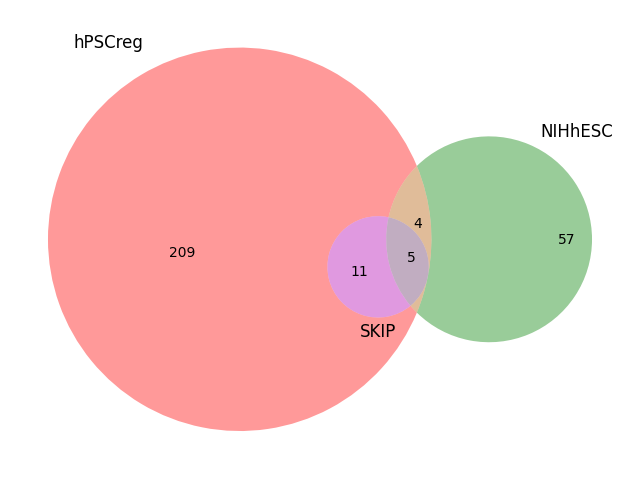

In [38]:
import pandas as pd
from matplotlib_venn import venn3
from matplotlib import pyplot as plt

# Calculate counts for each subset in the Venn diagram
only_hPSCreg = aus_filtered_df[(aus_filtered_df['hPSCreg']) & (~aus_filtered_df['NIHhESC']) & (~aus_filtered_df['SKIP'])].shape[0]

only_NIHhESC = aus_filtered_df[(~aus_filtered_df['hPSCreg']) & (aus_filtered_df['NIHhESC']) & (~aus_filtered_df['SKIP'])].shape[0]
only_SKIP = aus_filtered_df[(~aus_filtered_df['hPSCreg']) & (~aus_filtered_df['NIHhESC']) & (aus_filtered_df['SKIP'])].shape[0]

hPSCreg_NIHhESC = aus_filtered_df[(aus_filtered_df['hPSCreg']) & (aus_filtered_df['NIHhESC']) & (~aus_filtered_df['SKIP'])].shape[0]
hPSCreg_SKIP = aus_filtered_df[(aus_filtered_df['hPSCreg']) & (~aus_filtered_df['NIHhESC']) & (aus_filtered_df['SKIP'])].shape[0]
NIHhESC_SKIP = aus_filtered_df[(~aus_filtered_df['hPSCreg']) & (aus_filtered_df['NIHhESC']) & (aus_filtered_df['SKIP'])].shape[0]

all_three = aus_filtered_df[(aus_filtered_df['hPSCreg']) & (aus_filtered_df['NIHhESC']) & (aus_filtered_df['SKIP'])].shape[0]

# Plot the Venn diagram
plt.figure(figsize=(8, 8))
venn = venn3(
    subsets=(only_hPSCreg, only_NIHhESC, hPSCreg_NIHhESC,
             only_SKIP, hPSCreg_SKIP, NIHhESC_SKIP, all_three),
    set_labels=("hPSCreg", "NIHhESC", "SKIP")
)

#plt.title("Venn Diagram: hPSCreg, NIHhESC, and SKIP")
plt.show()
